In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [7]:
# Shuffle the datasets
import random
brainT
np.random.shuffle(brainT)
print(brainT)

[[ 0.0  7.8  635.6 ...  3.7  1.0  0.0]
 [ 1.0  0.9  107.8 ...  4.5  0.9  0.0]
 [ 1.0  15.9  1114.3 ...  4.6  1.0  0.0]
 ...
 [ 0.0  8.5  979.5 ...  5.0  1.0  0.0]
 [ 0.0  3.7  296.0 ...  5.8  1.0  0.0]
 [ 1.0  19.5  1229.0 ...  4.9  1.0  0.0]]


In [8]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [11]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

Epoch 1/500
83/83 [==============================] - 2s 9ms/step - loss: 159.9781 - accuracy: 0.4506 - val_loss: 153.9496 - val_accuracy: 0.4078
Epoch 2/500
83/83 [==============================] - 0s 5ms/step - loss: 130.0829 - accuracy: 0.4487 - val_loss: 121.3253 - val_accuracy: 0.4105
Epoch 3/500
83/83 [==============================] - 0s 5ms/step - loss: 101.8693 - accuracy: 0.4495 - val_loss: 90.9505 - val_accuracy: 0.4264
Epoch 4/500
83/83 [==============================] - 0s 5ms/step - loss: 74.2123 - accuracy: 0.4522 - val_loss: 62.5049 - val_accuracy: 0.4309
Epoch 5/500
83/83 [==============================] - 0s 5ms/step - loss: 50.5152 - accuracy: 0.4552 - val_loss: 37.7778 - val_accuracy: 0.4557
Epoch 6/500
83/83 [==============================] - 0s 5ms/step - loss: 31.2901 - accuracy: 0.4867 - val_loss: 20.9718 - val_accuracy: 0.5186
Epoch 7/500
83/83 [==============================] - 0s 4ms/step - loss: 22.1074 - accuracy: 0.5471 - val_loss: 16.3667 - val_accuracy: 0

Epoch 116/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1596 - accuracy: 0.9487 - val_loss: 0.2603 - val_accuracy: 0.9193
Epoch 117/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1561 - accuracy: 0.9461 - val_loss: 0.2313 - val_accuracy: 0.9229
Epoch 118/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1560 - accuracy: 0.9514 - val_loss: 0.2247 - val_accuracy: 0.9264
Epoch 119/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1581 - accuracy: 0.9453 - val_loss: 0.2811 - val_accuracy: 0.9060
Epoch 120/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1579 - accuracy: 0.9457 - val_loss: 0.1835 - val_accuracy: 0.9548
Epoch 121/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1556 - accuracy: 0.9506 - val_loss: 0.1895 - val_accuracy: 0.9477
Epoch 122/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1564 - accuracy: 0.9472 - val_loss: 0.1800 - val_accuracy: 0.9539

83/83 [==============================] - 0s 5ms/step - loss: 0.1206 - accuracy: 0.9613 - val_loss: 0.1644 - val_accuracy: 0.9707
Epoch 231/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9651 - val_loss: 0.1568 - val_accuracy: 0.9654
Epoch 232/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.9609 - val_loss: 0.1544 - val_accuracy: 0.9654
Epoch 233/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9636 - val_loss: 0.2749 - val_accuracy: 0.9105
Epoch 234/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.9605 - val_loss: 0.1745 - val_accuracy: 0.9592
Epoch 235/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1214 - accuracy: 0.9658 - val_loss: 0.1514 - val_accuracy: 0.9725
Epoch 236/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1220 - accuracy: 0.9624 - val_loss: 0.1546 - val_accuracy: 0.9725
Epoch 237/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1030 - accuracy: 0.9719 - val_loss: 0.1961 - val_accuracy: 0.9486
Epoch 345/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1024 - accuracy: 0.9723 - val_loss: 0.1472 - val_accuracy: 0.9761
Epoch 346/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1029 - accuracy: 0.9708 - val_loss: 0.1444 - val_accuracy: 0.9734
Epoch 347/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1026 - accuracy: 0.9692 - val_loss: 0.1544 - val_accuracy: 0.9716
Epoch 348/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1032 - accuracy: 0.9704 - val_loss: 0.1637 - val_accuracy: 0.9637
Epoch 349/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0990 - accuracy: 0.9692 - val_loss: 0.1432 - val_accuracy: 0.9725
Epoch 350/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1024 - accuracy: 0.9746 - val_loss: 0.1431 - val_accuracy: 0.9778
Epoch 351/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0945 - accuracy: 0.9708 - val_loss: 0.1547 - val_accuracy: 0.9725
Epoch 459/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0953 - accuracy: 0.9734 - val_loss: 0.1882 - val_accuracy: 0.9495
Epoch 460/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0956 - accuracy: 0.9730 - val_loss: 0.1397 - val_accuracy: 0.9734
Epoch 461/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0929 - accuracy: 0.9757 - val_loss: 0.1617 - val_accuracy: 0.9645
Epoch 462/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0924 - accuracy: 0.9772 - val_loss: 0.1464 - val_accuracy: 0.9707
Epoch 463/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0968 - accuracy: 0.9749 - val_loss: 0.1382 - val_accuracy: 0.9805
Epoch 464/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0920 - accuracy: 0.9753 - val_loss: 0.1494 - val_accuracy: 0.9725
Epoch 465/500

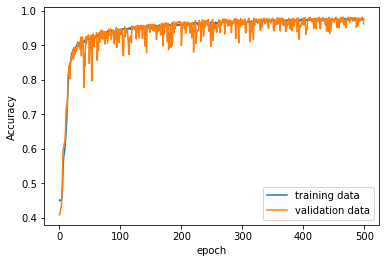

In [12]:
#build model for Training
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation = 'sigmoid'))

#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N1check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [13]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 3ms/step - loss: 0.1272 - accuracy: 0.9586


In [14]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.9610


In [15]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 1.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]]
83/83 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]]


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9972997299729973
0.9126853377265239
0.9531182795698925


In [17]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]]
36/36 [==============================] - 0s 3ms/step
[[ 0.0]
 [ 1.0]
 [ 0.9]
 [ 0.0]
 [ 0.0]]


In [18]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9953379953379954
0.9104477611940298
0.9510022271714922
